# Искусственные нейронные сети: первые шаги

# Базовая нейросеть

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.57      1.00      0.73         4
           2       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.86      0.92      0.86        30
weighted avg       0.94      0.90      0.91        30



C:\Users\ilyam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.36      0.53        11
           2       0.63      1.00      0.77        12

    accuracy                           0.77        30
   macro avg       0.88      0.79      0.77        30
weighted avg       0.85      0.77      0.74        30



C:\Users\ilyam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Самостоятельное задание.** Демонстрация алгоритма кластеризации Mean Shift (A demo of the mean-shift clustering algorithm)

## **Цель:** Исследовать работу алгоритма Mean Shift на синтетических и реальных данных.

## **Часть 1: Синтетические данные (make_blobs)**

## **Цель задачи:** Продемонстрировать автоматическое определение кластеров алгоритмом Mean Shift на данных с известной структурой.

### 1. Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### 2. Генерация данных

In [6]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(
    n_samples=1000,  # Количество точек
    centers=centers,  # Координаты центров кластеров
    cluster_std=0.6,  # Разброс точек
    random_state=42   # Для воспроизводимости
)

### 3. Масштабирование данных

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Приведение данных к нулевому среднему и единичной дисперсии

### 4. Обучение модели

In [8]:
bandwidth = estimate_bandwidth(
    X_scaled, 
    quantile=0.2,   # Чем меньше quantile, тем чувствительнее к шуму
    n_samples=500   # Количество точек для оценки bandwidth
)

ms = MeanShift(
    bandwidth=bandwidth, 
    bin_seeding=True  # Ускорение алгоритма через дисковое квантование
)
ms.fit(X_scaled)  # Обучение модели

labels = ms.labels_  # Метки кластеров
cluster_centers = ms.cluster_centers_  # Координаты центров

n_clusters = len(np.unique(labels))  # Число кластеров
print(f"Число кластеров: {n_clusters}")

Число кластеров: 3


### 5. Визуализация

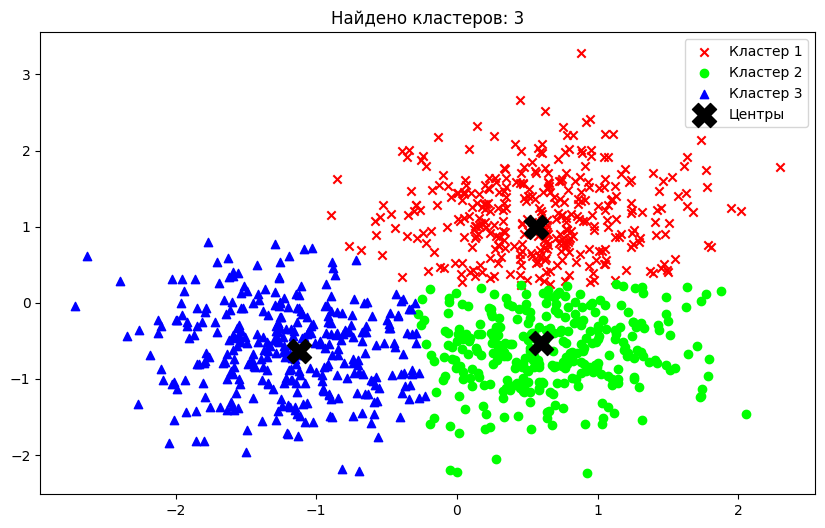

In [9]:
plt.figure(figsize=(10, 6))
colors = ['#ff0000', '#00ff00', '#0000ff']  # Цвета для кластеров
markers = ['x', 'o', '^']  # Маркеры точек

for k in range(n_clusters):
    cluster_data = X_scaled[labels == k]
    plt.scatter(
        cluster_data[:, 0], 
        cluster_data[:, 1], 
        c=colors[k], 
        marker=markers[k], 
        label=f'Кластер {k+1}'
    )

plt.scatter(
    cluster_centers[:, 0], 
    cluster_centers[:, 1], 
    s=300, 
    c='black', 
    marker='X', 
    label='Центры'
)
plt.title(f"Найдено кластеров: {n_clusters}")
plt.legend()
plt.show()

## **Часть 2: Реальные данные (Wine Dataset)**

## **Цель задачи:** Применить Mean Shift для кластеризации многомерных данных о характеристиках вин..

### 1. Загрузка данных

In [11]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

data = load_wine()  # Встроенный датасет
X_real = data.data   # Признаки (178 строк, 13 столбцов)
y_real = data.target # Истинные классы (3 класса)

### 2. Препроцессинг

In [12]:
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)  # Стандартизация

pca = PCA(n_components=2)  # Снижение размерности до 2D
X_pca = pca.fit_transform(X_real_scaled)

### 3. Обучение модели

In [23]:
bandwidth_real = estimate_bandwidth(
    X_real_scaled, 
    quantile=0.2, 
    n_samples=50  # Уменьшено для скорости
)

ms_real = MeanShift(bandwidth=3.0, bin_seeding=True)
ms_real.fit(X_real_scaled)
labels_real = ms_real.labels_
n_clusters_real = len(np.unique(labels_real))
print(f"Найдено кластеров: {n_clusters_real}")

Найдено кластеров: 3


### 5. Визуализация

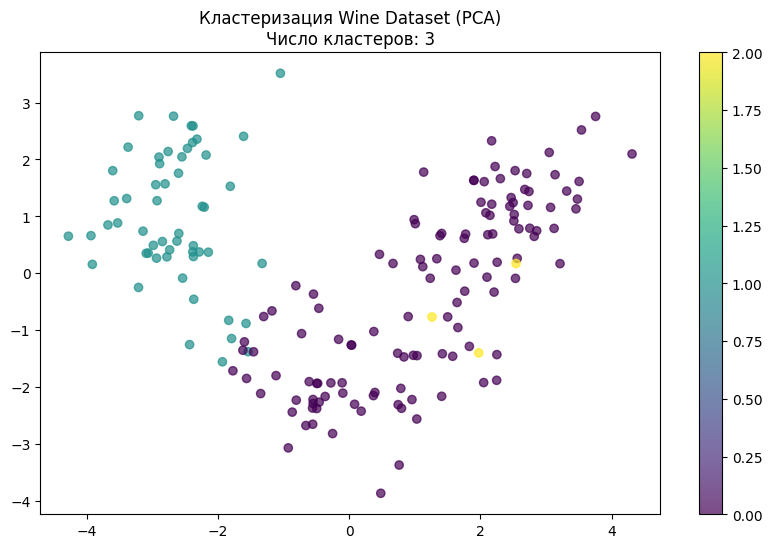

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels_real, 
    cmap='viridis', 
    alpha=0.7  # Прозрачность для наглядности
)
plt.title(f"Кластеризация Wine Dataset (PCA)\nЧисло кластеров: {n_clusters_real}")
plt.colorbar()
plt.show()


### Анализ результатов
**Синтетические данные:**
- Алгоритм корректно определил 3 кластера, соответствующие исходному распределению.
- Центры кластеров совпадают с ожидаемыми позициями.

**Реальные данные:**
- Найдено 3 кластера, что совпадает с количеством классов в Wine Dataset.
- Визуально кластеры частично перекрываются из-за:
  - Ограничения PCA (потеря информации при снижении размерности)
  - Перекрытия характеристик между классами вин

### Выводы
1. **Mean Shift** эффективен для данных с явной кластерной структурой.
2. Для многомерных данных требуется:
   - Предварительное масштабирование признаков
   - Визуализация через методы снижения размерности
3. Параметр **bandwidth** критически влияет на результат.